# Import Library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes

print('Setup Completed !')

Setup Completed !


# Import Data:

In [2]:
df = pd.read_excel('data_doanhthu_key.xlsx')
df.head()

,key,Mã CTKM,Tên CTKM,CTKM,Loại chương trình,SL/Số tiền tối thiểu,SL/Số tiền tối đa,Ngày bắt đầu,Ngày kết thúc,Thời gian KM,...,Tổng SL bán không KM trong thời gian KM,Số ngày tồn <=0 trong thời gian KM,Sức bán thường 347,Số ngày có tồn trong thời gian KM,TT,Sức bán thường,Tỷ lệ số ngày tồn = 0 / số ngày KM,Thời điểm khuyến mãi,Doanh thu KM,TT theo doanh thu
0,0,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,...,0,273,0.0,7,2.857143,0.1,0.975000,Dài hạn,68000.0,2.490842
1,1,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,...,0,272,0.0,8,1.250000,0.1,0.971429,Dài hạn,34000.0,1.089744
2,2,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,...,0,270,0.0,10,1.000000,0.1,0.964286,Dài hạn,34000.0,0.871795
3,3,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,...,0,269,0.0,11,3.636364,0.1,0.960714,Dài hạn,136000.0,3.170163
4,4,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,...,0,269,0.0,11,1.818182,0.1,0.960714,Dài hạn,68000.0,1.585082


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364747 entries, 0 to 364746
Data columns (total 59 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   key                                      364747 non-null  int64         
 1   Mã CTKM                                  364747 non-null  int64         
 2   Tên CTKM                                 364747 non-null  object        
 3   CTKM                                     364747 non-null  object        
 4   Loại chương trình                        364747 non-null  object        
 5   SL/Số tiền tối thiểu                     76462 non-null   float64       
 6   SL/Số tiền tối đa                        0 non-null       float64       
 7   Ngày bắt đầu                             364747 non-null  datetime64[ns]
 8   Ngày kết thúc                            364747 non-null  datetime64[ns]
 9   Thời gian KM              

In [4]:
df.dtypes

key                                                 int64
Mã CTKM                                             int64
Tên CTKM                                           object
CTKM                                               object
Loại chương trình                                  object
SL/Số tiền tối thiểu                              float64
SL/Số tiền tối đa                                 float64
Ngày bắt đầu                               datetime64[ns]
Ngày kết thúc                              datetime64[ns]
Thời gian KM                                        int64
Loại hình thức khuyến mãi                          object
Áp dụng hình thức khuyến mãi                       object
Tỷ lệ KM                                          float64
Giá trị KM                                        float64
Mã SP khuyến mãi tặng/bán kèm                     float64
Số lượng tặng/ bán kèm                            float64
Đơn giá tặng/bán kèm                              float64
Model         

In [5]:
df = df.drop('key', axis =1)
df.head()

,Mã CTKM,Tên CTKM,CTKM,Loại chương trình,SL/Số tiền tối thiểu,SL/Số tiền tối đa,Ngày bắt đầu,Ngày kết thúc,Thời gian KM,Loại hình thức khuyến mãi,...,Tổng SL bán không KM trong thời gian KM,Số ngày tồn <=0 trong thời gian KM,Sức bán thường 347,Số ngày có tồn trong thời gian KM,TT,Sức bán thường,Tỷ lệ số ngày tồn = 0 / số ngày KM,Thời điểm khuyến mãi,Doanh thu KM,TT theo doanh thu
0,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,0,273,0.0,7,2.857143,0.1,0.975000,Dài hạn,68000.0,2.490842
1,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,0,272,0.0,8,1.250000,0.1,0.971429,Dài hạn,34000.0,1.089744
2,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,0,270,0.0,10,1.000000,0.1,0.964286,Dài hạn,34000.0,0.871795
3,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,0,269,0.0,11,3.636364,0.1,0.960714,Dài hạn,136000.0,3.170163
4,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,0,269,0.0,11,1.818182,0.1,0.960714,Dài hạn,68000.0,1.585082


# K-Prototype Clustering:

In [45]:
df_new = df[['CTKM', 'Thời gian KM', 'Tỷ lệ KM', 'Miền', 'Thu nhập dân cư quanh shop', 'Phân loại mức độ cạnh tranh FMCG', 'Loại ST', 'Công dụng sản phẩm', 'Là thương hiệu nổi tiếng hay không', 'TE/NL', 'phân loại size', 'Phân khúc giá', 'Trưng bày', 'Sức bán thường', 'Tỷ lệ số ngày tồn = 0 / số ngày KM', 'Thời điểm khuyến mãi', 'TT theo doanh thu']]
df_new

,CTKM,Thời gian KM,Tỷ lệ KM,Miền,Thu nhập dân cư quanh shop,Phân loại mức độ cạnh tranh FMCG,Loại ST,Công dụng sản phẩm,Là thương hiệu nổi tiếng hay không,TE/NL,phân loại size,Phân khúc giá,Trưng bày,Sức bán thường,Tỷ lệ số ngày tồn = 0 / số ngày KM,Thời điểm khuyến mãi,TT theo doanh thu
0,Giảm giá,280,0.128205,Miền Tây,Khu dân cư có thu nhập khá,Không cạnh tranh cao,"1,2 tỷ - < 2 tỷ",Ngừa sâu,No,Trẻ em,Nhỏ (<=100g),Cao,Trên kệ,0.100000,0.975000,Dài hạn,2.490842
1,Giảm giá,280,0.128205,Miền Tây,Khu dân cư có thu nhập thấp - nông nghiệp,Cạnh tranh cao,"1,2 tỷ - < 2 tỷ",Ngừa sâu,No,Trẻ em,Nhỏ (<=100g),Cao,Trên kệ,0.100000,0.971429,Dài hạn,1.089744
2,Giảm giá,280,0.128205,Miền Đông,Khu dân cư có thu nhập thấp - phi nông nghiệp,Cạnh tranh cao,"1,2 tỷ - < 2 tỷ",Ngừa sâu,No,Trẻ em,Nhỏ (<=100g),Cao,Trên kệ,0.100000,0.964286,Dài hạn,0.871795
3,Giảm giá,280,0.128205,Miền Đông,Khu dân cư có thu nhập thấp - phi nông nghiệp,Không cạnh tranh cao,"1,2 tỷ - < 2 tỷ",Ngừa sâu,No,Trẻ em,Nhỏ (<=100g),Cao,Trên kệ,0.100000,0.960714,Dài hạn,3.170163
4,Giảm giá,280,0.128205,Miền Tây,Khu dân cư có thu nhập thấp - phi nông nghiệp,Không cạnh tranh cao,"900 triệu - <1,2 tỷ",Ngừa sâu,No,Trẻ em,Nhỏ (<=100g),Cao,Trên kệ,0.100000,0.960714,Dài hạn,1.585082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364742,"HĐ P/S 89,000đ được giảm 15,000đ",24,0.168539,Cao Nguyên,Shop không có data,Shop không có data,"1,2 tỷ - < 2 tỷ",Ngừa sâu,Yes,Người lớn,Nhỏ (<=100g),Trung,Trên kệ,0.571400,0.000000,Trước tết,0.000000
364743,"HĐ P/S 89,000đ được giảm 15,000đ",24,0.168539,HCM,Shop không có data,Shop không có data,"1,2 tỷ - < 2 tỷ",Ngừa sâu,Yes,Người lớn,Nhỏ (<=100g),Trung,Trên kệ,0.333333,0.000000,Trước tết,0.000000
364744,"HĐ P/S 89,000đ được giảm 15,000đ",24,0.168539,HCM,Shop không có data,Shop không có data,"1,2 tỷ - < 2 tỷ",Ngừa sâu,Yes,Người lớn,Nhỏ (<=100g),Trung,Trên kệ,0.142900,0.000000,Trước tết,0.000000
364745,"HĐ P/S 89,000đ được giảm 15,000đ",24,0.168539,Miền Tây,Shop không có data,Shop không có data,"900 triệu - <1,2 tỷ",Ngừa sâu,Yes,Người lớn,Nhỏ (<=100g),Trung,Trên kệ,0.428600,0.000000,Trước tết,0.000000


In [46]:
col_cat = [df_new.columns.get_loc(col) for col in list(df_new.select_dtypes('object').columns)]
col_cat

[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15]

In [47]:
X = df_new.values
X

array([['Giảm giá', 280, 0.1282051282051282, ..., 0.975, 'Dài hạn',
        2.490842490842491],
       ['Giảm giá', 280, 0.1282051282051282, ..., 0.9714285714285714,
        'Dài hạn', 1.08974358974359],
       ['Giảm giá', 280, 0.1282051282051282, ..., 0.9642857142857143,
        'Dài hạn', 0.8717948717948718],
       ...,
       ['HĐ P/S 89,000đ được giảm 15,000đ', 24, 0.1685393258426966, ...,
        0.0, 'Trước tết', 0.0],
       ['HĐ P/S 89,000đ được giảm 15,000đ', 24, 0.1685393258426966, ...,
        0.0, 'Trước tết', 0.0],
       ['HĐ P/S 89,000đ được giảm 15,000đ', 24, 0.1685393258426966, ...,
        0.0, 'Trước tết', 0.0]], dtype=object)

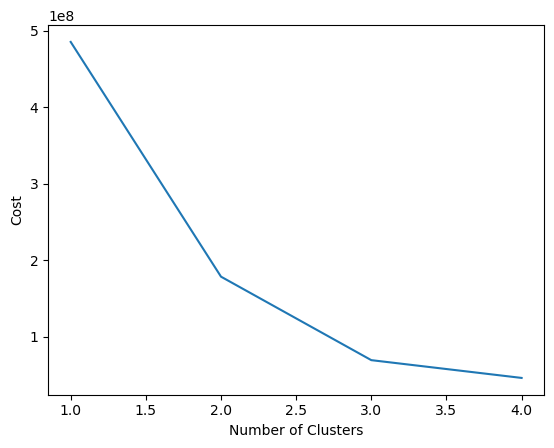

In [48]:
cost = []
for num_clusters in range(1,5):
    kproto = KPrototypes(n_jobs = -1, n_clusters=num_clusters, init='Cao', verbose=0)
    kproto.fit_predict(X, categorical=col_cat)
    cost.append(kproto.cost_)

plt.plot(range(1,5), cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

In [57]:
from kneed import KneeLocator
kn = KneeLocator(range(1,5), cost, curve='convex', direction='decreasing', S=0.1, online = True)
print('Optimal number of clusters:', kn.elbow)

Optimal number of clusters: 2


In [17]:
kproto = KPrototypes(n_clusters= kn.elbow, init='Cao', verbose=0)
clusters = kproto.fit_predict(X, categorical=col_cat)
df['Cluster'] = clusters
df.head()

,Mã CTKM,Tên CTKM,CTKM,Loại chương trình,SL/Số tiền tối thiểu,SL/Số tiền tối đa,Ngày bắt đầu,Ngày kết thúc,Thời gian KM,Loại hình thức khuyến mãi,...,Số ngày tồn <=0 trong thời gian KM,Sức bán thường 347,Số ngày có tồn trong thời gian KM,TT,Sức bán thường,Tỷ lệ số ngày tồn = 0 / số ngày KM,Thời điểm khuyến mãi,Doanh thu KM,TT theo doanh thu,Cluster
0,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,273,0.0,7,2.857143,0.1,0.975000,Dài hạn,68000.0,2.490842,1
1,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,272,0.0,8,1.250000,0.1,0.971429,Dài hạn,34000.0,1.089744,1
2,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,270,0.0,10,1.000000,0.1,0.964286,Dài hạn,34000.0,0.871795,1
3,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,269,0.0,11,3.636364,0.1,0.960714,Dài hạn,136000.0,3.170163,1
4,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,269,0.0,11,1.818182,0.1,0.960714,Dài hạn,68000.0,1.585082,1


# Clustering Analysis:

In [18]:
cluster_num = df.groupby('Cluster')['CTKM'].count().sort_values(ascending = False)
cluster_num

Cluster
1    323685
0     41062
Name: CTKM, dtype: int64

In [21]:
df_cluster_num = cluster_num.to_frame('Number').rename_axis('Cluster').reset_index()
df_cluster_num

,Cluster,Number
0,1,323685
1,0,41062


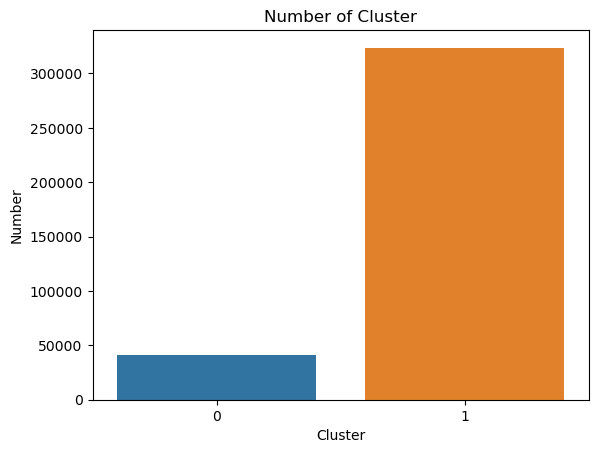

In [22]:
ax = sns.barplot(df_cluster_num, x = 'Cluster', y = 'Number')
plt.title('Number of Cluster')
plt.show();

In [24]:
df.tail()

,Mã CTKM,Tên CTKM,CTKM,Loại chương trình,SL/Số tiền tối thiểu,SL/Số tiền tối đa,Ngày bắt đầu,Ngày kết thúc,Thời gian KM,Loại hình thức khuyến mãi,...,Số ngày tồn <=0 trong thời gian KM,Sức bán thường 347,Số ngày có tồn trong thời gian KM,TT,Sức bán thường,Tỷ lệ số ngày tồn = 0 / số ngày KM,Thời điểm khuyến mãi,Doanh thu KM,TT theo doanh thu,Cluster
364742,701655,"CTKM THÁNG 1 (28/12-20/1) HĐ P/S 89,000đ được ...","HĐ P/S 89,000đ được giảm 15,000đ",Khuyến mãi tặng tiền mua hàng,89000.0,NaN,2022-12-28,2023-01-20,24,Giảm giá,...,0,0.5714,24,0.875044,0.571400,0.0,Trước tết,0.0,0.0,0
364743,701655,"CTKM THÁNG 1 (28/12-20/1) HĐ P/S 89,000đ được ...","HĐ P/S 89,000đ được giảm 15,000đ",Khuyến mãi tặng tiền mua hàng,89000.0,NaN,2022-12-28,2023-01-20,24,Giảm giá,...,0,0.0000,24,1.500000,0.333333,0.0,Trước tết,0.0,0.0,0
364744,701655,"CTKM THÁNG 1 (28/12-20/1) HĐ P/S 89,000đ được ...","HĐ P/S 89,000đ được giảm 15,000đ",Khuyến mãi tặng tiền mua hàng,89000.0,NaN,2022-12-28,2023-01-20,24,Giảm giá,...,0,0.1429,24,4.373688,0.142900,0.0,Trước tết,0.0,0.0,0
364745,701655,"CTKM THÁNG 1 (28/12-20/1) HĐ P/S 89,000đ được ...","HĐ P/S 89,000đ được giảm 15,000đ",Khuyến mãi tặng tiền mua hàng,89000.0,NaN,2022-12-28,2023-01-20,24,Giảm giá,...,0,0.4286,24,0.291647,0.428600,0.0,Trước tết,0.0,0.0,0
364746,701655,"CTKM THÁNG 1 (28/12-20/1) HĐ P/S 89,000đ được ...","HĐ P/S 89,000đ được giảm 15,000đ",Khuyến mãi tặng tiền mua hàng,89000.0,NaN,2022-12-28,2023-01-20,24,Giảm giá,...,0,0.2857,24,0.583363,0.285700,0.0,Trước tết,0.0,0.0,0


In [26]:
df_clus_0 = df[df['Cluster'] == 0]
df_clus_0

,Mã CTKM,Tên CTKM,CTKM,Loại chương trình,SL/Số tiền tối thiểu,SL/Số tiền tối đa,Ngày bắt đầu,Ngày kết thúc,Thời gian KM,Loại hình thức khuyến mãi,...,Số ngày tồn <=0 trong thời gian KM,Sức bán thường 347,Số ngày có tồn trong thời gian KM,TT,Sức bán thường,Tỷ lệ số ngày tồn = 0 / số ngày KM,Thời điểm khuyến mãi,Doanh thu KM,TT theo doanh thu,Cluster
126,461985,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-10-31,222,Giảm giá,...,207,0.0000,15,2.666667,0.100000,0.932432,Dài hạn,100000.0,2.298851,0
131,461985,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-10-31,222,Giảm giá,...,206,0.0000,16,12.500000,0.100000,0.927928,Dài hạn,500000.0,10.775862,0
140,461985,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-10-31,222,Giảm giá,...,204,0.0000,18,5.000000,0.100000,0.918919,Dài hạn,225000.0,4.310345,0
146,461985,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-10-31,222,Giảm giá,...,203,0.0000,19,2.105263,0.100000,0.914414,Dài hạn,100000.0,1.814882,0
147,461985,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-10-31,222,Giảm giá,...,202,0.0000,20,6.000000,0.100000,0.909910,Dài hạn,300000.0,5.172414,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364742,701655,"CTKM THÁNG 1 (28/12-20/1) HĐ P/S 89,000đ được ...","HĐ P/S 89,000đ được giảm 15,000đ",Khuyến mãi tặng tiền mua hàng,89000.0,NaN,2022-12-28,2023-01-20,24,Giảm giá,...,0,0.5714,24,0.875044,0.571400,0.000000,Trước tết,0.0,0.000000,0
364743,701655,"CTKM THÁNG 1 (28/12-20/1) HĐ P/S 89,000đ được ...","HĐ P/S 89,000đ được giảm 15,000đ",Khuyến mãi tặng tiền mua hàng,89000.0,NaN,2022-12-28,2023-01-20,24,Giảm giá,...,0,0.0000,24,1.500000,0.333333,0.000000,Trước tết,0.0,0.000000,0
364744,701655,"CTKM THÁNG 1 (28/12-20/1) HĐ P/S 89,000đ được ...","HĐ P/S 89,000đ được giảm 15,000đ",Khuyến mãi tặng tiền mua hàng,89000.0,NaN,2022-12-28,2023-01-20,24,Giảm giá,...,0,0.1429,24,4.373688,0.142900,0.000000,Trước tết,0.0,0.000000,0
364745,701655,"CTKM THÁNG 1 (28/12-20/1) HĐ P/S 89,000đ được ...","HĐ P/S 89,000đ được giảm 15,000đ",Khuyến mãi tặng tiền mua hàng,89000.0,NaN,2022-12-28,2023-01-20,24,Giảm giá,...,0,0.4286,24,0.291647,0.428600,0.000000,Trước tết,0.0,0.000000,0


In [27]:
df_clus_1 = df[df['Cluster'] == 1]
df_clus_1

,Mã CTKM,Tên CTKM,CTKM,Loại chương trình,SL/Số tiền tối thiểu,SL/Số tiền tối đa,Ngày bắt đầu,Ngày kết thúc,Thời gian KM,Loại hình thức khuyến mãi,...,Số ngày tồn <=0 trong thời gian KM,Sức bán thường 347,Số ngày có tồn trong thời gian KM,TT,Sức bán thường,Tỷ lệ số ngày tồn = 0 / số ngày KM,Thời điểm khuyến mãi,Doanh thu KM,TT theo doanh thu,Cluster
0,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,273,0.0000,7,2.857143,0.1000,0.975000,Dài hạn,68000.0,2.490842,1
1,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,272,0.0000,8,1.250000,0.1000,0.971429,Dài hạn,34000.0,1.089744,1
2,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,270,0.0000,10,1.000000,0.1000,0.964286,Dài hạn,34000.0,0.871795,1
3,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,269,0.0000,11,3.636364,0.1000,0.960714,Dài hạn,136000.0,3.170163,1
4,462011,CTKM tháng 3 - (24/03-28/12) - 15955,Giảm giá,Khuyến mãi đích danh theo sản phẩm,NaN,NaN,2022-03-24,2022-12-28,280,Giảm giá,...,269,0.0000,11,1.818182,0.1000,0.960714,Dài hạn,68000.0,1.585082,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363085,701655,"CTKM THÁNG 1 (28/12-20/1) HĐ P/S 89,000đ được ...","HĐ P/S 89,000đ được giảm 15,000đ",Khuyến mãi tặng tiền mua hàng,89000.0,NaN,2022-12-28,2023-01-20,24,Giảm giá,...,0,0.0000,24,0.000000,0.3016,0.000000,Trước tết,0.0,0.000000,1
363086,701655,"CTKM THÁNG 1 (28/12-20/1) HĐ P/S 89,000đ được ...","HĐ P/S 89,000đ được giảm 15,000đ",Khuyến mãi tặng tiền mua hàng,89000.0,NaN,2022-12-28,2023-01-20,24,Giảm giá,...,0,0.2857,24,0.000000,0.2857,0.000000,Trước tết,0.0,0.000000,1
363087,701655,"CTKM THÁNG 1 (28/12-20/1) HĐ P/S 89,000đ được ...","HĐ P/S 89,000đ được giảm 15,000đ",Khuyến mãi tặng tiền mua hàng,89000.0,NaN,2022-12-28,2023-01-20,24,Giảm giá,...,0,0.4286,24,0.000000,0.4286,0.000000,Trước tết,0.0,0.000000,1
363088,701655,"CTKM THÁNG 1 (28/12-20/1) HĐ P/S 89,000đ được ...","HĐ P/S 89,000đ được giảm 15,000đ",Khuyến mãi tặng tiền mua hàng,89000.0,NaN,2022-12-28,2023-01-20,24,Giảm giá,...,0,0.2857,24,0.000000,0.2857,0.000000,Trước tết,0.0,0.000000,1


In [31]:
df_rev_clus = df[['Cluster','Doanh thu KM', 'TT theo doanh thu']]
df_rev_clus = df_rev_clus.sort_values(by = 'Doanh thu KM', ascending = True)
df_rev_clus

,Cluster,Doanh thu KM,TT theo doanh thu
364746,0,0.0,0.000000
76410,0,0.0,0.000000
76409,0,0.0,0.000000
76408,0,0.0,0.000000
305366,0,0.0,0.000000
...,...,...,...
92132,1,29406000.0,100.000000
103868,1,31500000.0,100.000000
35908,1,32868000.0,100.000000
10389,1,74504000.0,100.000000


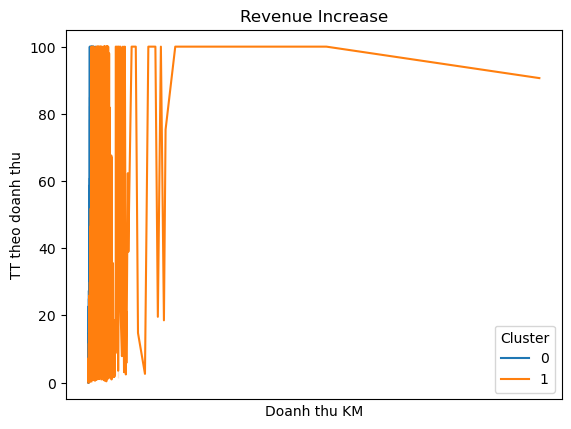

In [32]:
ax = sns.lineplot(df_rev_clus, x = 'Doanh thu KM', y = 'TT theo doanh thu', hue = 'Cluster')
plt.xticks([])
plt.title('Revenue Increase')
plt.show();

# K-Prototype Part 2:

In [33]:
df_clus_1_new = df_clus_1[['CTKM', 'Thời gian KM', 'Tỷ lệ KM', 'Miền', 'Thu nhập dân cư quanh shop', 'Phân loại mức độ cạnh tranh FMCG', 'Loại ST', 'Là thương hiệu nổi tiếng hay không', 'Giá bán KV chuẩn','TE/NL', 'phân loại size', 'Phân khúc giá', 'Sức bán thường', 'Tỷ lệ số ngày tồn = 0 / số ngày KM', 'Thời điểm khuyến mãi', 'TT theo doanh thu']]
df_clus_1_new

,CTKM,Thời gian KM,Tỷ lệ KM,Miền,Thu nhập dân cư quanh shop,Phân loại mức độ cạnh tranh FMCG,Loại ST,Là thương hiệu nổi tiếng hay không,Giá bán KV chuẩn,TE/NL,phân loại size,Phân khúc giá,Sức bán thường,Tỷ lệ số ngày tồn = 0 / số ngày KM,Thời điểm khuyến mãi,TT theo doanh thu
0,Giảm giá,280,0.128205,Miền Tây,Khu dân cư có thu nhập khá,Không cạnh tranh cao,"1,2 tỷ - < 2 tỷ",No,39000,Trẻ em,Nhỏ (<=100g),Cao,0.1000,0.975000,Dài hạn,2.490842
1,Giảm giá,280,0.128205,Miền Tây,Khu dân cư có thu nhập thấp - nông nghiệp,Cạnh tranh cao,"1,2 tỷ - < 2 tỷ",No,39000,Trẻ em,Nhỏ (<=100g),Cao,0.1000,0.971429,Dài hạn,1.089744
2,Giảm giá,280,0.128205,Miền Đông,Khu dân cư có thu nhập thấp - phi nông nghiệp,Cạnh tranh cao,"1,2 tỷ - < 2 tỷ",No,39000,Trẻ em,Nhỏ (<=100g),Cao,0.1000,0.964286,Dài hạn,0.871795
3,Giảm giá,280,0.128205,Miền Đông,Khu dân cư có thu nhập thấp - phi nông nghiệp,Không cạnh tranh cao,"1,2 tỷ - < 2 tỷ",No,39000,Trẻ em,Nhỏ (<=100g),Cao,0.1000,0.960714,Dài hạn,3.170163
4,Giảm giá,280,0.128205,Miền Tây,Khu dân cư có thu nhập thấp - phi nông nghiệp,Không cạnh tranh cao,"900 triệu - <1,2 tỷ",No,39000,Trẻ em,Nhỏ (<=100g),Cao,0.1000,0.960714,Dài hạn,1.585082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363085,"HĐ P/S 89,000đ được giảm 15,000đ",24,0.168539,Miền Đông,Shop không có data,Shop không có data,<900 triệu,Yes,39000,Người lớn,Lớn (>200g),Trung,0.3016,0.000000,Trước tết,0.000000
363086,"HĐ P/S 89,000đ được giảm 15,000đ",24,0.168539,Cao Nguyên,Shop không có data,Shop không có data,"900 triệu - <1,2 tỷ",Yes,39000,Người lớn,Lớn (>200g),Trung,0.2857,0.000000,Trước tết,0.000000
363087,"HĐ P/S 89,000đ được giảm 15,000đ",24,0.168539,HCM,Shop không có data,Shop không có data,"1,2 tỷ - < 2 tỷ",Yes,39000,Người lớn,Lớn (>200g),Trung,0.4286,0.000000,Trước tết,0.000000
363088,"HĐ P/S 89,000đ được giảm 15,000đ",24,0.168539,Miền Tây,Shop không có data,Shop không có data,"900 triệu - <1,2 tỷ",Yes,39000,Người lớn,Lớn (>200g),Trung,0.2857,0.000000,Trước tết,0.000000


In [35]:
col_cat_1 = [df_clus_1_new.columns.get_loc(col1) for col1 in list(df_clus_1_new.select_dtypes('object').columns)]
col_cat_1

[0, 3, 4, 5, 6, 7, 9, 10, 11, 14]

In [36]:
X1 = df_clus_1_new.values
X1

array([['Giảm giá', 280, 0.1282051282051282, ..., 0.975, 'Dài hạn',
        2.490842490842491],
       ['Giảm giá', 280, 0.1282051282051282, ..., 0.9714285714285714,
        'Dài hạn', 1.08974358974359],
       ['Giảm giá', 280, 0.1282051282051282, ..., 0.9642857142857143,
        'Dài hạn', 0.8717948717948718],
       ...,
       ['HĐ P/S 89,000đ được giảm 15,000đ', 24, 0.1685393258426966, ...,
        0.0, 'Trước tết', 0.0],
       ['HĐ P/S 89,000đ được giảm 15,000đ', 24, 0.1685393258426966, ...,
        0.0, 'Trước tết', 0.0],
       ['HĐ P/S 89,000đ được giảm 15,000đ', 24, 0.1685393258426966, ...,
        0.0, 'Trước tết', 0.0]], dtype=object)

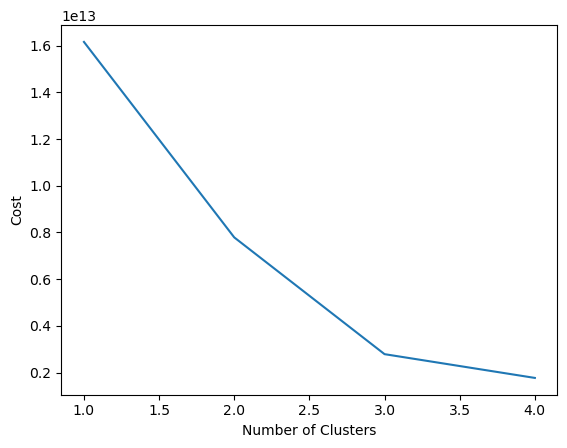

In [37]:
cost1 = []
for num_clusters_1 in range(1,5):
    kproto = KPrototypes(n_jobs = -1, n_clusters=num_clusters_1, init='Cao', verbose=0)
    kproto.fit_predict(X1, categorical=col_cat_1)
    cost1.append(kproto.cost_)

plt.plot(range(1,5), cost1)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

In [53]:
from kneed import KneeLocator
kn = KneeLocator(range(1,5), cost1, curve='convex', direction='decreasing', S=0.1, online = True)
print('Optimal number of clusters:', kn.elbow)

Optimal number of clusters: 3


In [58]:
kproto = KPrototypes(n_clusters= kn.elbow, init='Cao', verbose=0)
clusters = kproto.fit_predict(X1, categorical=col_cat_1)
df_clus_1['Cluster_1'] = clusters
df_clus_1.head()